In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('ikea2.csv')
data.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,kewords,topic_group,topic_desc
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Item discontinued,Item discontinued,NaN,NaN,NaN
1,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,NaN,NaN,NaN
2,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
3,400550,EKEDALEN,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
4,40426138,HENRIKSDAL,Bar furniture,395.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,NaN,NaN,NaN


In [4]:
data.shape

(3694, 18)

In [5]:
data.describe()

,item_id,price,depth,height,width,topic_group
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000,1409.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853,1.102910
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771,0.852835
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000,0.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000,0.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000,1.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000,2.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000,2.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   old_price            3694 non-null   object 
 5   sellable_online      3694 non-null   bool   
 6   link                 3694 non-null   object 
 7   other_colors         3694 non-null   object 
 8   short_description    3694 non-null   object 
 9   designer             3694 non-null   object 
 10  depth                2231 non-null   float64
 11  height               2706 non-null   float64
 12  width                3105 non-null   float64
 13  product_description  3694 non-null   object 
 14  current_status       3694 non-null   object 
 15  kewords              1394 non-null   o

Handle Missing Values: Identify and handle missing values in columns such as depth, keywords, topic_group, and topic_desc.

In [9]:
data.isnull().sum()

item_id                   0
name                      0
category                  0
price                     0
old_price                 0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                  1463
height                  988
width                   589
product_description       0
current_status            0
kewords                2300
topic_group            2285
topic_desc             2285
dtype: int64

In [12]:
data['kewords'].value_counts()

kewords
white keep neat lets use Find suitable use humid                                     23
fitted online stylish                                                                18
white build wide low different create perfect clean modern easy place                16
white icing small makes big Clean discreet blend right enhance modern                15
light white stained need good ‚Äì sturdy wooden lightweight slide put                13
                                                                                     ..
store high it‚Äôs difficult reach makes reach 's nice look makes reach store high     1
ergonomic keeps comfy focused adjustable tilt help relax Suitable                     1
white looks nice dining solid stands Solid hardwearing natural                        1
white looks nice dining solid stands                                                  1
white 135x51x222-350 Make lovely decorative adjustable help utilise full              1
Name: count, Length: 723

In [11]:
data['height'].value_counts()

height
74.0     189
236.0    113
75.0      82
73.0      77
83.0      73
        ... 
34.0       1
24.0       1
31.0       1
58.0       1
208.0      1
Name: count, Length: 193, dtype: int64

In [13]:
data['topic_desc'].value_counts()

topic_desc
Durability and Appearance          592
Color and Aesthetics, Usability    447
Style and Functionality            370
Name: count, dtype: int64

In [14]:
data['topic_group'].value_counts()

topic_group
2.0    592
0.0    447
1.0    370
Name: count, dtype: int64

Standardize Columns: Convert relevant columns to consistent data types (e.g., price and old_price).


In [15]:
data['old_price'].value_counts()

old_price
No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 1,010           1
SR 3,045           1
SR 5,725           1
SR 2,525           1
SR 1,755           1
Name: count, Length: 365, dtype: int64

In [16]:
data['price'].value_counts()

price
395.0     66
25.0      54
195.0     54
175.0     51
995.0     51
          ..
729.0      1
4345.0     1
1247.0     1
2616.4     1
1572.0     1
Name: count, Length: 979, dtype: int64

In [20]:
data['old_price'] = data['old_price'].astype(str)
data['old_price'] = data['old_price'].str.replace(',', '.')
data['old_price'] = data['old_price'].replace('', None)
data['old_price'] = data['old_price'].astype(float)

In [21]:
data['old_price'].value_counts()

old_price
995.000    12
1.385      11
595.000    10
275.000     8
2.375       7
           ..
1.010       1
3.045       1
4.125       1
2.525       1
1.755       1
Name: count, Length: 364, dtype: int64

In [25]:
print(data['old_price'].isnull().sum())    # Yəni 654 sətir  boşdur
print("--------------")
print(data['old_price'].value_counts().sum())     # Yəni 3040 sətir var

3040
--------------
654


In [26]:
data['is_discounted'] = data['old_price'] > data['price']

In [27]:
data['is_discounted'].value_counts()

is_discounted
False    3369
True      325
Name: count, dtype: int64

In [29]:
discounted_items = data[data['is_discounted'] == True]
print(discounted_items[['price', 'old_price', 'is_discounted']].head())

    price  old_price  is_discounted
2   177.0      295.0           True
5   140.0      175.0           True
7   796.0      995.0           True
24  100.0      125.0           True
31  871.0      940.0           True


/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_2389/2492267040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_discounted', data=data, palette=['salmon', 'skyblue'])


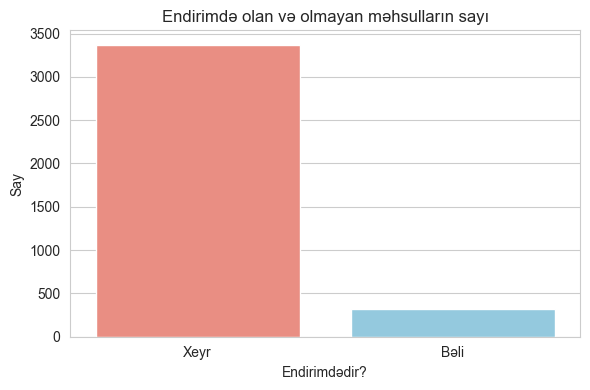

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='is_discounted', data=data, palette=['salmon', 'skyblue'])

plt.title('Endirimdə olan və olmayan məhsulların sayı')
plt.xlabel('Endirimdədir?')
plt.ylabel('Say')
plt.xticks([0, 1], ['Xeyr', 'Bəli'])
plt.tight_layout()
plt.show()

In [32]:
print(data.isnull().sum())  # NaN olan dəyərlərin sayı

item_id                   0
name                      0
category                  0
price                     0
old_price              3040
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                  1463
height                  988
width                   589
product_description       0
current_status            0
kewords                2300
topic_group            2285
topic_desc             2285
is_discounted             0
dtype: int64


In [33]:
total_rows = len(data)

nan_percent=(data.isnull().sum()/total_rows)*100
nan_percent = nan_percent.round(2)
print(nan_percent)

item_id                 0.00
name                    0.00
category                0.00
price                   0.00
old_price              82.30
sellable_online         0.00
link                    0.00
other_colors            0.00
short_description       0.00
designer                0.00
depth                  39.60
height                 26.75
width                  15.94
product_description     0.00
current_status          0.00
kewords                62.26
topic_group            61.86
topic_desc             61.86
is_discounted           0.00
dtype: float64
